# Proyecto de programación: El indice de marginalización de México

In [213]:
#Importamos las paqueterias que utilizariamos en el documento
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow 
#Importamos la función pearsonr para la Correlación Lineal
from scipy.stats import pearsonr 


El presente proyecto se basa en la utilización de la base de datos denominada *"Índice de Marginación por Entidad Federativa y Municipio 2020"*  con el objetivo de extraer conclusiones acerca de la relación existente entre diversos indicadores socioeconómicos y el índice de marginación en los diferentes municipios del país.

La tabla obtenida de un archivo en formato *CSV* tiene el nombre **IMM_2020**. A continuación, se presentan los valores contenidos en dicha tabla utilizando las herramientas proporcionadas por la librería "pandas".

In [214]:
#Cargamos la Base de Datos en un nuevo DataFrame
IMM_2020 = pd.read_csv('IMM_2020[31].csv', encoding='latin-1')
IMM_2020

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,32,Zacatecas,32054,Villa Hidalgo,19446,7.497894,36.678176,3.010808,0.452908,2.254246,1.137416,21.932484,100.000000,90.877128,55.044146,Bajo,0.861915
2465,32,Zacatecas,32055,Villanueva,31558,4.199744,44.806459,2.536486,0.551254,1.073864,0.895418,15.269627,56.774827,81.912592,56.747058,Muy bajo,0.888580
2466,32,Zacatecas,32056,Zacatecas,149607,1.442438,19.436229,0.294739,0.163292,1.278559,0.484463,9.340958,7.461549,57.885307,60.176191,Muy bajo,0.942275
2467,32,Zacatecas,32057,Trancoso,20455,5.119108,31.992586,3.066130,0.500392,2.860086,1.344192,23.544577,16.788071,83.056133,56.958073,Muy bajo,0.891884


## Descripción del DataFrame

Cada columna del DataFrame viene nombrada con una clave especial. Es necesario tener un diccionario que explique el significado de cada clave, por lo tanto, lo creamos e introducimos en el espacio siguiente. 

### Diccionario de las Claves en las columnas

- **CVE_ENT**: Clave de la entidad federal (# del Estado)
- **NOM_ENT**: Nombre de la entidad federal (Estados)
- **CVE_MUN**: Clave del municipio (# del municipio)
- **NOM_MUN**: Nombre del municipio (municipio)
- **POB_TOT**: Población total 
- **ANALF**: Porcentaje de analfabetismo en personas mayores a 15 años ($I_1^i$)
- **ANALF**: Porcentaje de personas mayores a 15 años sin educación básica ($I_2^i$)
- **OVSDE**: Porcentaje de ocupantes en casas sin drenaje ni excusado ($I_3^i$)
- **OVSEE**: Porcentaje de ocupantes en casas sin energía eléctrica ($I_4^i$)
- **OVSAE**: Porcentaje de ocupantes en casas sin agua entuvada ($I_5^i$)
- **OVPT**: Porcentaje de ocupantes en casas con piso de tierra ($I_6^i$)
- **VHAC**: Porcentaje de viviendas con hacinamiento ($I_7^i)
- **PL.5000**: Porcentaje de población en localidades menores a 5000 habitantes ($I_8^i$)
- **PO2SM**: Porcentaje de población trabajando con salarios menores a 2 salarios mínimos ($I_9^i$)
- **IM_2020**: Índice de marginación
- **GM_2020**: Grado de marginación (Muy Bajo, Bajo, Alto, Muy Alto)
- **IMN_2020**: Índice de marginación normalizado [0,1]

In [215]:
#Solicitamos una descripción general de todas las columnas del Dataframe
IMM_2020.describe()

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


Como podemos observar, hay algunas columnas que sus valores numéricos únicamente sirven para indexar los otros valores en la tabla. 

Vamos a analizar el DataFrame sin esos valores

In [216]:
#Seleccionamos las columnas que realmente nos interesan describir, utilizando una lista
columnas_interes = ['POB_TOT','ANALF','SBASC','OVSDE','OVSEE','OVSAE','OVPT','VHAC','PL.5000','PO2SM','IM_2020','IMN_2020']
#Utilizando la sintaxis de los diccionarios, describimos:
IMM_2020[columnas_interes].describe()

,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


### Análisis Básico del DataFrame

Vamos a nombrar algunos de los valores que más me parecen interesantes:

- Existe al menos un municipio donde la mitad de su población mayor a 15 años, es analfabeta
- El promedio de la población mayor a 15 años que no recibió educación básica en la nación, es del 45%
- Para los porcentajes de los ocupantes sin ciertos servicios, el valor máximo de estas variables esta muy disperso a los valores promedios
- Existen muchos municipios con poblaciones en sus localidades menor a 5000 habitantes 
- Es preocupante que en promedio el 82% de personas en el país no ganen más de dos salarios mínimos

## Porcentaje de municipios por estado con índices de marginación

Obteniendo los datos de las comunas ['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'GM_2020']. 

Probaremos dos propuestas de código para la visualización de la gráfica

### Propuesta 1: Gráfica de Barras

In [217]:
# Seleccionar las columnas necesarias del DataFrame original
columnas = ['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'GM_2020']
df_nuevo = IMM_2020[columnas]

# Crear el diccionario 'data' con los valores de las columnas
data = {
    'CVE_ENT': df_nuevo['CVE_ENT'].tolist(),
    'NOM_ENT': df_nuevo['NOM_ENT'].tolist(),
    'CVE_MUN': df_nuevo['CVE_MUN'].tolist(),
    'NOM_MUN': df_nuevo['NOM_MUN'].tolist(),
    'GM_2020': df_nuevo['GM_2020'].tolist()
}

# Crear el nuevo DataFrame y calcular el porcentaje de municipios por estados y grados de marginación


df = pd.DataFrame(data)

# Calcular el porcentaje de municipios por estados y grados de marginación
porcentaje = df.groupby(['NOM_ENT', 'GM_2020']).size() / df.groupby('NOM_ENT').size() * 100
porcentaje = porcentaje.reset_index(name='Porcentaje')

# Filtrar los grados de marginación específicos
grados_marginacion = ["Muy bajo", "Bajo", "Medio", "Alto", "Muy alto"]
porcentaje_filtrado = porcentaje[porcentaje['GM_2020'].isin(grados_marginacion)]

# Mostrar el nuevo DataFrame
print(porcentaje_filtrado)

                 NOM_ENT   GM_2020  Porcentaje
0         Aguascalientes  Muy bajo  100.000000
1        Baja California     Medio   16.666667
2        Baja California  Muy bajo   83.333333
3    Baja California Sur  Muy bajo  100.000000
4               Campeche      Alto   16.666667
..                   ...       ...         ...
118              Yucatán  Muy bajo    6.603774
119            Zacatecas      Alto    3.448276
120            Zacatecas      Bajo   48.275862
121            Zacatecas     Medio    8.620690
122            Zacatecas  Muy bajo   39.655172

[123 rows x 3 columns]


In [218]:
# Crear el diccionario anidado
diccionario_final = {}

for _, row in porcentaje_filtrado.iterrows():
    estado = row['NOM_ENT']
    grado_marginacion = row['GM_2020']
    porcentaje = row['Porcentaje']
    
    if estado not in diccionario_final:
        diccionario_final[estado] = {}
    
    diccionario_final[estado][grado_marginacion] = porcentaje

# Mostrar el diccionario final
print(diccionario_final)

{'Aguascalientes': {'Muy bajo': 100.0}, 'Baja California': {'Medio': 16.666666666666664, 'Muy bajo': 83.33333333333334}, 'Baja California Sur': {'Muy bajo': 100.0}, 'Campeche': {'Alto': 16.666666666666664, 'Bajo': 50.0, 'Medio': 16.666666666666664, 'Muy bajo': 16.666666666666664}, 'Chiapas': {'Alto': 53.2258064516129, 'Bajo': 5.64516129032258, 'Medio': 24.193548387096776, 'Muy alto': 16.129032258064516, 'Muy bajo': 0.8064516129032258}, 'Chihuahua': {'Alto': 2.9850746268656714, 'Bajo': 28.35820895522388, 'Medio': 5.970149253731343, 'Muy alto': 16.417910447761194, 'Muy bajo': 46.26865671641791}, 'Ciudad de México': {'Muy bajo': 100.0}, 'Coahuila de Zaragoza': {'Bajo': 21.052631578947366, 'Muy bajo': 78.94736842105263}, 'Colima': {'Bajo': 20.0, 'Muy bajo': 80.0}, 'Durango': {'Alto': 12.82051282051282, 'Bajo': 25.64102564102564, 'Medio': 10.256410256410255, 'Muy alto': 5.128205128205128, 'Muy bajo': 46.15384615384615}, 'Guanajuato': {'Alto': 6.521739130434782, 'Bajo': 39.130434782608695, '

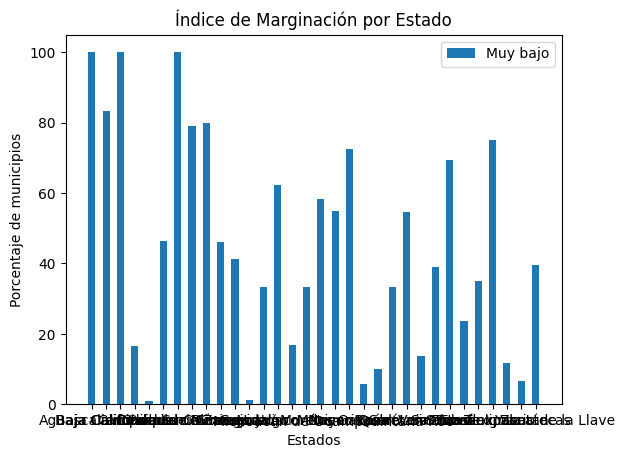

In [219]:

# Datos de ejemplo
datos = diccionario_final

# Función para generar el gráfico
def graficar_porcentaje_municipios(datos):
    estados = list(datos.keys())
    marginaciones = list(datos[estados[0]].keys())
    num_marginaciones = len(marginaciones)

    # Preparar los datos para el gráfico
    porcentajes = np.zeros((len(estados), num_marginaciones))
    for i, estado in enumerate(estados):
        for j, marginacion in enumerate(marginaciones):
            porcentajes[i, j] = datos[estado][marginacion]

    # Crear el gráfico de barras apiladas
    x = np.arange(len(estados))
    ancho_barras = 0.5

    fig, ax = plt.subplots()
    bottom = None

    for i, marginacion in enumerate(marginaciones):
        porcentaje = porcentajes[:, i]
        ax.bar(x, porcentaje, ancho_barras, bottom=bottom, label=marginacion)
        if bottom is None:
            bottom = porcentaje
        else:
            bottom += porcentaje

    ax.set_xlabel('Estados')
    ax.set_ylabel('Porcentaje de municipios')
    ax.set_title('Índice de Marginación por Estado')
    ax.set_xticks(x)
    ax.set_xticklabels(estados)
    ax.legend()

    # Mostrar el gráfico
    plt.show()

# Llamar a la función para graficar los datos de ejemplo
graficar_porcentaje_municipios(datos)

**CONCLUSIÓN**: Este arreglo en un gráfico de barras no parece la opción más conveniente para los datos que queremos visualizar

### Propuesta 2: Gráfica de Barras acopladas

In [220]:
#Grados de marginalidad
marginacion_orden = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']

# Tabla dinamica: Cada nombre de estado es un índice, las columas son los grados de marginación
# Se cuenta cada municipio por estado en cada nivel de marginación

Marginacion_Estados = IMM_2020.pivot_table(index='NOM_ENT', columns='GM_2020', values='CVE_MUN', aggfunc='count')

Marginacion_Estados = Marginacion_Estados[marginacion_orden]    #Se ordenan las columnas

Marginacion_Estados['Total Municipios'] = Marginacion_Estados.sum(axis=1)   #Se agrega el total de municipios

# Los valores nulos (que indican que no hay municipios con ese grado) son designados por 0
Marginacion_Estados.fillna(0, inplace=True) 

# Se calculan los porcentajes relativos de municipios por estado para cada grado de marginación
for grado in marginacion_orden:
    Marginacion_Estados[grado + ' (%)'] = Marginacion_Estados[grado] / Marginacion_Estados['Total Municipios'] * 100

Marginacion_Estados[[grado + ' (%)' for grado in marginacion_orden]]

GM_2020,Muy bajo (%),Bajo (%),Medio (%),Alto (%),Muy alto (%)
NOM_ENT,,,,,
Aguascalientes,100.000000,0.000000,0.000000,0.000000,0.000000
Baja California,83.333333,0.000000,16.666667,0.000000,0.000000
Baja California Sur,100.000000,0.000000,0.000000,0.000000,0.000000
Campeche,16.666667,50.000000,16.666667,16.666667,0.000000
Chiapas,0.806452,5.645161,24.193548,53.225806,16.129032
Chihuahua,46.268657,28.358209,5.970149,2.985075,16.417910
Ciudad de México,100.000000,0.000000,0.000000,0.000000,0.000000
Coahuila de Zaragoza,78.947368,21.052632,0.000000,0.000000,0.000000
Colima,80.000000,20.000000,0.000000,0.000000,0.000000


C:\Users\mikeg\AppData\Local\Temp\ipykernel_8760\2472761528.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(nombres_estados, rotation=90)


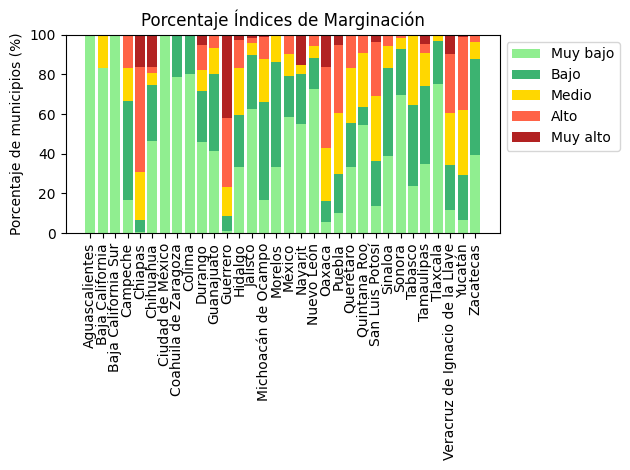

In [221]:
# Crear la gráfica de barras apiladas
nombres_estados = Marginacion_Estados.index
porcentajes = [Marginacion_Estados[grado + ' (%)'] for grado in marginacion_orden]

fig, ax = plt.subplots()

# Configurar los colores de las barras
colores = ['lightgreen', 'mediumseagreen', 'gold', 'tomato', 'firebrick']

# Crear las barras apiladas
bottom = np.zeros(len(nombres_estados))
for i, grado in enumerate(marginacion_orden):
    ax.bar(nombres_estados, porcentajes[i], bottom=bottom, label=grado, color=colores[i])
    bottom += porcentajes[i]

# Configurar los ejes y el título
ax.set_ylabel('Porcentaje de municipios (%)')
ax.set_ylim([0, 100])
ax.set_xticklabels(nombres_estados, rotation=90)
ax.legend(title='Grado de Marginación')

# Crear una leyenda separada
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Porcentaje Índices de Marginación")

# Mostrar la gráfica
plt.tight_layout()
fig.savefig('comparacion1.png', format='png')
plt.show()

**CONCLUSIÓN**: Este arreglo nos permite comparar de manera mas visual la distribución de los datos en la gráfica. *Nos quedaremos con esta gráfica*.

## Porcentaje anterior relativo a la población total de cada Estado

Obteniendo los datos de las comunas ['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'GM_2020', 'POB_TOT']. La comparación anterior ahora estará en proporción a la población total de cada estado. Utilizaremos la misma propuesta 2 utilizado en el apartado anterior.

In [222]:
# Tabla dinamica: Cada nombre de estado es un índice, las columas son los grados de marginación
# Se suma la población de cada municipio por estado en cada nivel de marginación
Marginacion_Estados_poblacion = IMM_2020.pivot_table(index='NOM_ENT', columns='GM_2020', values='POB_TOT', aggfunc='sum')
Marginacion_Estados_poblacion = Marginacion_Estados_poblacion[marginacion_orden]
Marginacion_Estados_poblacion['Total Municipios'] = Marginacion_Estados_poblacion.sum(axis=1)
Marginacion_Estados_poblacion.fillna(0, inplace=True)

# Se calculan los porcentajes relativos de municipios por estado para cada grado de marginación
for grado in marginacion_orden:
    Marginacion_Estados_poblacion[grado + ' (%)'] = Marginacion_Estados_poblacion[grado] / Marginacion_Estados_poblacion['Total Municipios'] * 100

Marginacion_Estados_poblacion[[grado + ' (%)' for grado in marginacion_orden]]

GM_2020,Muy bajo (%),Bajo (%),Medio (%),Alto (%),Muy alto (%)
NOM_ENT,,,,,
Aguascalientes,100.000000,0.000000,0.000000,0.000000,0.000000
Baja California,96.880675,0.000000,3.119325,0.000000,0.000000
Baja California Sur,100.000000,0.000000,0.000000,0.000000,0.000000
Campeche,58.481650,27.574451,5.474475,8.469424,0.000000
Chiapas,10.897651,18.005014,21.239187,31.036894,18.821255
Chihuahua,91.138466,2.734730,0.536924,0.697726,4.892154
Ciudad de México,100.000000,0.000000,0.000000,0.000000,0.000000
Coahuila de Zaragoza,98.387045,1.612955,0.000000,0.000000,0.000000
Colima,95.454005,4.545995,0.000000,0.000000,0.000000


C:\Users\mikeg\AppData\Local\Temp\ipykernel_8760\3054214051.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(nombres_estados, rotation=90)


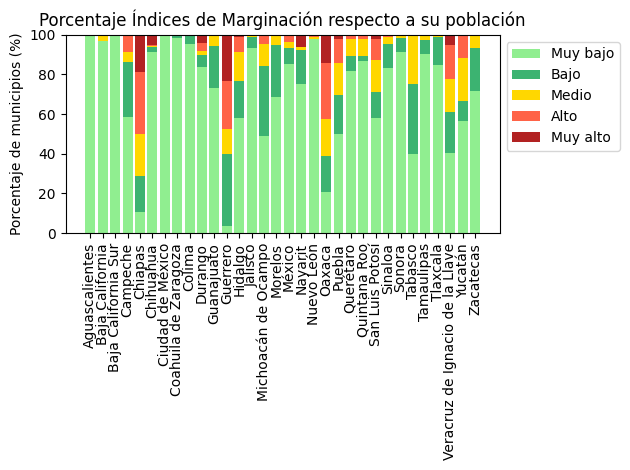

In [223]:
# Crear la gráfica de barras apiladas
nombres_estados = Marginacion_Estados_poblacion.index
porcentajes = [Marginacion_Estados_poblacion[grado + ' (%)'] for grado in marginacion_orden]

fig, ax = plt.subplots()

# Configurar los colores de las barras
colores = ['lightgreen', 'mediumseagreen', 'gold', 'tomato', 'firebrick']

# Crear las barras apiladas
bottom = np.zeros(len(nombres_estados))
for i, grado in enumerate(marginacion_orden):
    ax.bar(nombres_estados, porcentajes[i], bottom=bottom, label=grado, color=colores[i])
    bottom += porcentajes[i]

# Configurar los ejes y el título
ax.set_ylabel('Porcentaje de municipios (%)')
ax.set_ylim([0, 100])
ax.set_xticklabels(nombres_estados, rotation=90)
ax.legend(title='Grado de Marginación')

# Crear una leyenda separada
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Porcentaje Índices de Marginación respecto a su población")

# Mostrar la gráfica
plt.tight_layout()
fig.savefig('comparacion2.jpg', format='jpg')
plt.show()

¿Notas alguna diferencia respecto a la gráfica utilizada en el apartado anterior?

## Análisis de las gráficas anteriores

Primero juntamos ambas gráficas en una misma figura:

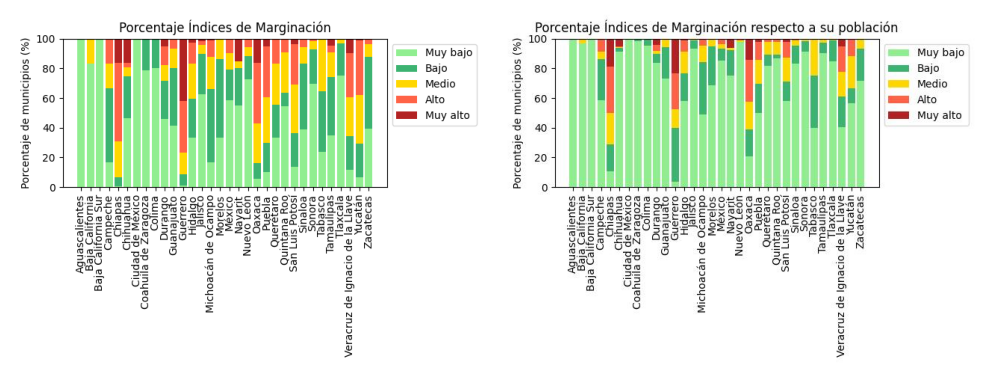

In [224]:
#Creamos un código para colocar ambas imágenes una al lado de la otra
import matplotlib.image as mpimg

# Ruta de las imágenes
imagen1_path = 'comparacion1.png'
imagen2_path = 'comparacion2.jpg'

# Cargar las imágenes
imagen1 = mpimg.imread(imagen1_path)
imagen2 = mpimg.imread(imagen2_path)

# Crear la figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la primera imagen en el primer subplot
axes[0].imshow(imagen1)
axes[0].axis('off')

# Mostrar la segunda imagen en el segundo subplot
axes[1].imshow(imagen2)
axes[1].axis('off')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura con las imágenes
plt.show()

Usando un análisis formológico del tamaño de las barras en ambas imágenes, obtengo dos conclusiones principales.

**CONCLUSIONES**:

1. La tendencia general en todos los estados, de la primer gráfica a la segunda, es el aumento del porcentaje de municipios con valores *Muy Bajo* en su indice de marginación. Tendencia que puede significar que los municipios con niveles de marginación *Muy Bajo*, también representan a los que tienen mayor población en su respectivo estado.

2. Los estados de Chiapas, Guerrero y Oaxaca mantienen porcentajes altos en los demás niveles de marginación, comportamiento que continua en la segunda gráfica. Esto significa que incluso en sus municipios con mayor población, hay bastante marginación en estos estados. El gobierno nacional tendría que impulsar políticas socioeconómicas en estos estados principalmente.

## Correlación Lineal del Analfabetismo contra los demás Indicadores

**ANÁLISIS:**
1. Graficaremos la relación del Analfabetismo VS Indicadores con gráficas tipo *SCATTER*.

2. Depués utilizaremos la función *Pearsonr* para encontrar la correlación lineal entre los indicadores.

### ***Analfabetismo   VS   Población $<$ 5000***

In [225]:
#Creamos un DataFrame con ambas columnas de interés
analf_pob5000 = IMM_2020[['ANALF','PL.5000']]
analf_pob5000

,ANALF,PL.5000
0,1.644738,7.523683
1,3.526405,78.221049
2,4.491509,51.301288
3,3.144867,65.470588
4,2.380588,37.164143
...,...,...
2464,7.497894,100.000000
2465,4.199744,56.774827
2466,1.442438,7.461549
2467,5.119108,16.788071


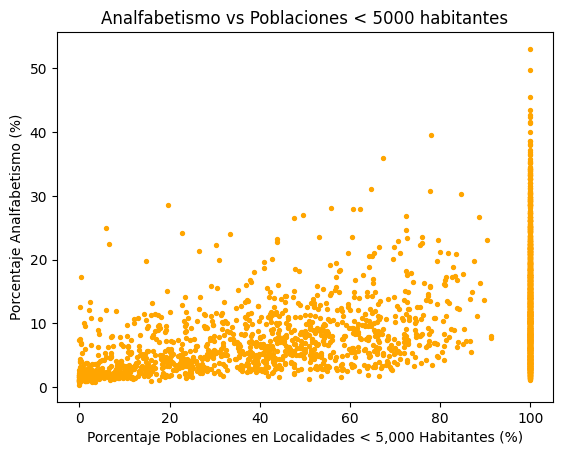

In [226]:
#Se separan los valores de ambas columnas
porcentaje_analfabetismo = analf_pob5000['ANALF']
porcentaje_poblaciones = analf_pob5000['PL.5000']

# Se crea el gráfico de dispersión 
plt.scatter(porcentaje_poblaciones, porcentaje_analfabetismo, s=8 ,linewidths=1, color='orange')
plt.xlabel('Porcentaje Poblaciones en Localidades < 5,000 Habitantes (%)')
plt.ylabel('Porcentaje Analfabetismo (%)')
plt.title('Analfabetismo vs Poblaciones < 5000 habitantes')

plt.show()

In [227]:
corr_coef, p_value = pearsonr(IMM_2020['PL.5000'], IMM_2020['ANALF'])
print("Coeficiente de correlación lineal:", corr_coef)
print("Valor p:", p_value)

Coeficiente de correlación lineal: 0.4493243935204586
Valor p: 5.563472018583696e-123


### ***Analfabetismo   VS   Población sin educación $>$ 15***

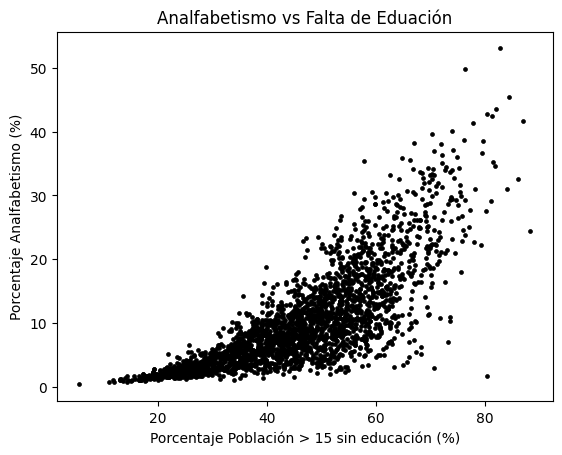

In [228]:
#Se separan los valores de ambas columnas
porcentaje_analfabetismo = IMM_2020['ANALF']
porcentaje_noEducacion = IMM_2020['SBASC']

# Se crea el gráfico de dispersión 
plt.scatter(porcentaje_noEducacion, porcentaje_analfabetismo, s=8 ,linewidths=0.5, color='black')
plt.xlabel('Porcentaje Población > 15 sin educación (%)')
plt.ylabel('Porcentaje Analfabetismo (%)')
plt.title('Analfabetismo vs Falta de Eduación')

plt.show()

In [229]:
corr_coef, p_value = pearsonr(IMM_2020['SBASC'], IMM_2020['ANALF'])
print("Coeficiente de correlación lineal:", corr_coef)
print("Valor p:", p_value)

Coeficiente de correlación lineal: 0.7790527533174834
Valor p: 0.0


### ***Analfabetismo   VS   No Drenaje/Excusado***

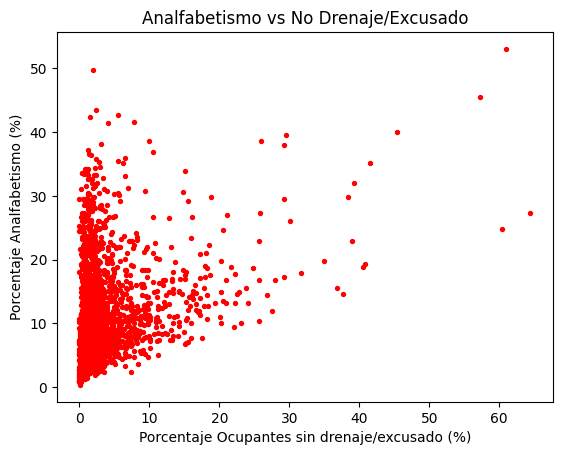

In [230]:
#Se separan los valores de ambas columnas
porcentaje_analfabetismo = IMM_2020['ANALF']
porcentaje_sdrenaje = IMM_2020['OVSDE']

# Se crea el gráfico de dispersión 
plt.scatter(porcentaje_sdrenaje, porcentaje_analfabetismo, s=8 ,linewidths=1, color='red')
plt.xlabel('Porcentaje Ocupantes sin drenaje/excusado (%)')
plt.ylabel('Porcentaje Analfabetismo (%)')
plt.title('Analfabetismo vs No Drenaje/Excusado')

plt.show()

In [231]:
corr_coef, p_value = pearsonr(IMM_2020['OVSDE'], IMM_2020['ANALF'])
print("Coeficiente de correlación lineal:", corr_coef)
print("Valor p:", p_value)

Coeficiente de correlación lineal: 0.34753743179949753
Valor p: 5.0874052817659026e-71


### ***Analfabetismo   VS   No E. Eléctrica***

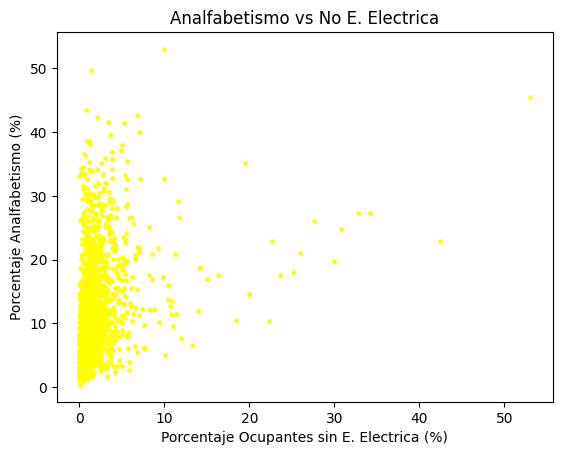

In [232]:
#Se separan los valores de ambas columnas
porcentaje_analfabetismo = IMM_2020['ANALF']
porcentaje_sEElectrica = IMM_2020['OVSEE']

# Se crea el gráfico de dispersión 
plt.scatter(porcentaje_sEElectrica, porcentaje_analfabetismo, s=8 ,linewidths=0.5, color='yellow')
plt.xlabel('Porcentaje Ocupantes sin E. Electrica (%)')
plt.ylabel('Porcentaje Analfabetismo (%)')
plt.title('Analfabetismo vs No E. Electrica')

plt.show()

In [233]:
corr_coef, p_value = pearsonr(IMM_2020['OVSEE'], IMM_2020['ANALF'])
print("Coeficiente de correlación lineal:", corr_coef)
print("Valor p:", p_value)

Coeficiente de correlación lineal: 0.35152289323666563
Valor p: 1.0030909450179994e-72


### ***Analfabetismo   VS   No Agua Entuvada***

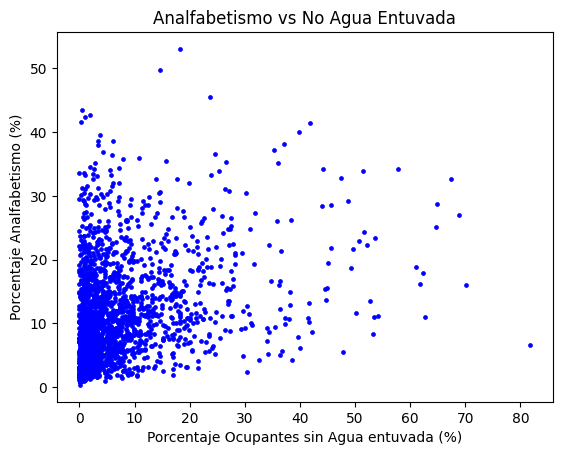

In [234]:
#Se separan los valores de ambas columnas
porcentaje_analfabetismo = IMM_2020['ANALF']
porcentaje_sAguaE = IMM_2020['OVSAE']

# Se crea el gráfico de dispersión 
plt.scatter(porcentaje_sAguaE, porcentaje_analfabetismo, s=8 ,linewidths=0.5, color='blue')
plt.xlabel('Porcentaje Ocupantes sin Agua entuvada (%)')
plt.ylabel('Porcentaje Analfabetismo (%)')
plt.title('Analfabetismo vs No Agua Entuvada')

plt.show()

In [235]:
corr_coef, p_value = pearsonr(IMM_2020['OVSAE'], IMM_2020['ANALF'])
print("Coeficiente de correlación lineal:", corr_coef)
print("Valor p:", p_value)

Coeficiente de correlación lineal: 0.36064378292285754
Valor p: 1.012024746865052e-76


### ***Analfabetismo   VS   Piso de Tierra***

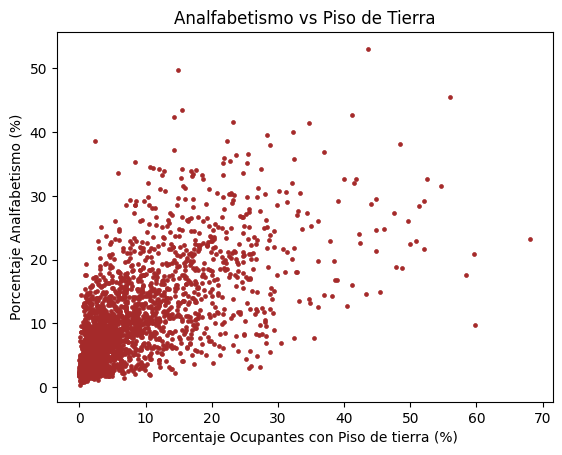

In [236]:
#Se separan los valores de ambas columnas
porcentaje_analfabetismo = IMM_2020['ANALF']
porcentaje_pisotierra = IMM_2020['OVPT']

# Se crea el gráfico de dispersión 
plt.scatter(porcentaje_pisotierra, porcentaje_analfabetismo, s=8 ,linewidths=0.5, color='brown')
plt.xlabel('Porcentaje Ocupantes con Piso de tierra (%)')
plt.ylabel('Porcentaje Analfabetismo (%)')
plt.title('Analfabetismo vs Piso de Tierra')

plt.show()

In [237]:
corr_coef, p_value = pearsonr(IMM_2020['OVPT'], IMM_2020['ANALF'])
print("Coeficiente de correlación lineal:", corr_coef)
print("Valor p:", p_value)

Coeficiente de correlación lineal: 0.6449598690385007
Valor p: 1.953584269047214e-290


### ***Analfabetismo   VS   Hacinamiento***

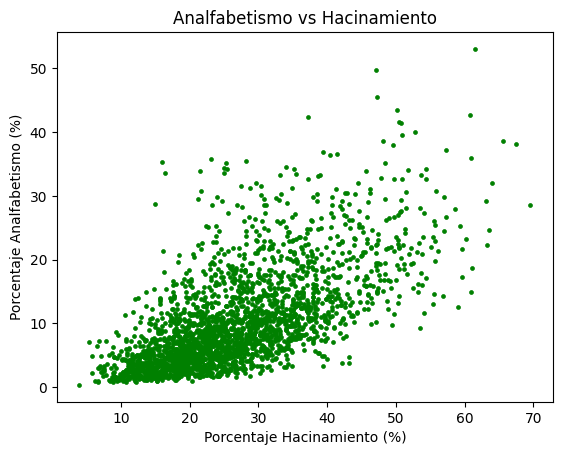

In [238]:
#Se separan los valores de ambas columnas
porcentaje_analfabetismo = IMM_2020['ANALF']
porcentaje_hacinamiento = IMM_2020['VHAC']

# Se crea el gráfico de dispersión 
plt.scatter(porcentaje_hacinamiento, porcentaje_analfabetismo, s=8 ,linewidths=0.5, color='green')
plt.xlabel('Porcentaje Hacinamiento (%)')
plt.ylabel('Porcentaje Analfabetismo (%)')
plt.title('Analfabetismo vs Hacinamiento')

plt.show()

In [239]:
corr_coef, p_value = pearsonr(IMM_2020['VHAC'], IMM_2020['ANALF'])
print("Coeficiente de correlación lineal:", corr_coef)
print("Valor p:", p_value)

Coeficiente de correlación lineal: 0.6585318233301867
Valor p: 6.36559949182055e-307


### ***Analfabetismo   VS   Ingresos bajos***

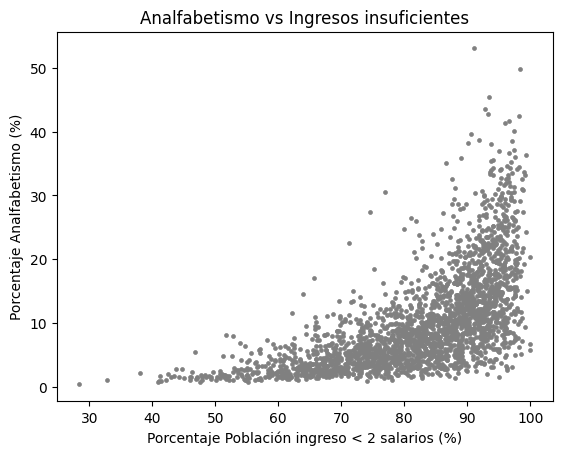

In [240]:
#Se separan los valores de ambas columnas
porcentaje_analfabetismo = IMM_2020['ANALF']
porcentaje_sIngreso = IMM_2020['PO2SM']

# Se crea el gráfico de dispersión 
plt.scatter(porcentaje_sIngreso, porcentaje_analfabetismo, s=8 ,linewidths=0.5, color='grey')
plt.xlabel('Porcentaje Población ingreso < 2 salarios (%)')
plt.ylabel('Porcentaje Analfabetismo (%)')
plt.title('Analfabetismo vs Ingresos insuficientes')

plt.show()

In [241]:
corr_coef, p_value = pearsonr(IMM_2020['PO2SM'], IMM_2020['ANALF'])
print("Coeficiente de correlación lineal:", corr_coef)
print("Valor p:", p_value)

Coeficiente de correlación lineal: 0.620010893394781
Valor p: 3.1711217291858317e-262


**CONCLUSIONES**: 

1. Al ser el Coeficiente de correlación lineal (*CCL*) positivo en todos los datos; el Porcentaje de Analfabetismo tiende a incrementarse cuando el Porcentaje de los demás Indicadores aumenta
2. Al ser el valor de ***p*** prácticamente $p = 0$ en todos los casos; la Hipótesis nula se descarta en todos los casos y, por lo tanto, el Coeficiente es distinto de cero.
3. Al ser el *CCL* entre el Analfabetismo VS $I_3$, $I_4$, $I_5$, $I_8$ = [0.35, 0.35, 0.36, 0.45] respectivamente; la Correlación entre estos Indicadores y el Analfabetismo es más cercana al 0 que al 1, por lo tanto, es más probable que no haya Correlación alguna entre ellas.  
4. Al ser el *CCL* entre el Analfabetismo VS $I_6$, $I_7$, $I_9$ = [0.64, 0.66, 0.62] respectivamente; la Correlación entre estos Indicadores y el Analfabetismo es más cercana al 1 que al 0, por lo tanto, es más probable que haya Correlación entre ellas.
5. Al ser el *CCL* entre el Analfabetismo VS Falta de Educación = 0.78 respectivamente; es muy probable que tanto el Analfabetismo sea causa de la Falta de Eduación, como la Falta de Educación Básica sea la causa socioeconómica principal del Analfabetismo en personas mayores a 15 años, en México. 